# British Airways Project
# Background information
British Airways (BA) is the flag carrier airline of the United Kingdom (UK). Every day, thousands of BA flights arrive to and depart from the UK, carrying customers across the world. Whether it’s for holidays, work or any other reason, the end-to-end process of scheduling, planning, boarding, fuelling, transporting, landing, and continuously running flights on time, efficiently and with top-class customer service is a huge task with many highly important responsibilities.

As a data scientist at BA, it will be your job to apply your analytical skills to influence real life multi-million-pound decisions from day one, making a tangible impact on the business as your recommendations, tools and models drive key business decisions, reduce costs and increase revenue.

Customers who book a flight with BA will experience many interaction points with the BA brand. Understanding a customer's feelings, needs, and feedback is crucial for any business, including BA.

This first task is focused on scraping and collecting customer feedback and reviewing data from a third-party source and analysing this data to present any insights you may uncover.

## Task 1 
### Scrape data from the web
The first thing to do will be to scrape review data from the web. For this, you should use a website called [Skytrax](https://www.airlinequality.com/).

The team leader wants you to focus on reviews specifically about the airline itself. You should collect as much data as you can in order to improve the output of your analysis. To get started with the data collection, you can use the “Jupyter Notebook” in the Resources section below to run some Python code that will help to collect some data. 

In [15]:
# Import web scraping libraries
from bs4 import BeautifulSoup
import requests
import lxml

# Import data manipulation libraries
import pandas as pd
import numpy as np

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings
sns.set_theme(style = 'whitegrid', palette = 'crest_r', context='notebook')

In [42]:
def get_review(review_list):
    """ Return a panda dataframe contains reviews and verify """
    reviews = [review.get_text().split('|') for review in review_list]
    
    #verified = ['No' if 'Not Verified' in review[0] else 'Yes' for review in reviews]
    
    review_text = []
    verified = []
    for review in reviews:
        if len(review) <= 1:
            review_text.append(review[0])
            verified.append('No')
        else:
            review_text.append(review[1])
            if 'Not Verified' in review[0]:
                verified.append('No')
            else:
                verified.append('Yes')
    
    #review_text = [review[0] if len(reviews) <= 1 else review[1] for review in reviews]
    return pd.DataFrame({'verified': verified, 'review': review_text})

In [46]:
def get_review_stats(tables):
    table_list = []
    for i in range(1, len(tables)):
        df = pd.read_html(str(tables[i]))[0]
        df = df.T
        df.columns = df.iloc[0]
        df = df.drop(df.index[0])
        table_list.append(df)
    df = pd.concat(table_list, axis=0, ignore_index=True)
    #df.drop(['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Inflight Entertainment', 
             #'Ground Service', 'Value For Money', 'Wifi & Connectivity'], axis=1, inplace=True)
    return df

In [44]:
def get_ba(link, starting_page, finishing_page):
    ba_list = []
    for i in range(starting_page , finishing_page):
        url = link + '/page/' + str(i) + '/'
        if i % 10 == 0:
            print('Page:', i)
        else:
            page = requests.get(url)
            soup = BeautifulSoup(page.text, 'html.parser')
            
            reviews_list = soup.select('.text_content')
            tables = soup.find_all('table', class_='review-ratings')
            
            df = pd.concat([get_review_stats(tables), get_review(reviews_list)], axis=1)
            ba_list.append(df)
    
    # Concatenate all DataFrames in df_list
    ba_df = pd.concat(ba_list, ignore_index=True)
    
    return ba_df
    
        

In [47]:
url = 'https://www.airlinequality.com/airline-reviews/british-airways'
ba_100 = get_ba(url, 1, 100)

Page: 10
Page: 20
Page: 30
Page: 40
Page: 50
Page: 60
Page: 70
Page: 80
Page: 90


In [49]:
ba_100.tail()

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,Inflight Entertainment,Wifi & Connectivity,verified,review
895,NaN,Couple Leisure,Economy Class,Bucharest to London,April 2019,12345,12345,NaN,12345,12345,no,NaN,NaN,Yes,I booked a flight from Bucharest to London a...
896,Boeing 787,Solo Leisure,Business Class,London to Calgary,December 2018,12345,12345,12345,12345,12345,yes,12345,NaN,Yes,"London to Calgary. Thank you to James, a Clu..."
897,Boeing 747,Couple Leisure,Business Class,Vancouver to London,April 2019,12345,12345,12345,12345,12345,yes,12345,NaN,Yes,"Vancouver to London, we were upgraded to bus..."
898,NaN,Couple Leisure,Business Class,Miami to London Heathrow,April 2019,12345,12345,12345,12345,12345,yes,12345,NaN,No,\r\nMiami to London Heathrow with British Ai...
899,NaN,Solo Leisure,Economy Class,Houston to London Heathrow,April 2019,12345,12345,12345,12345,12345,no,NaN,NaN,Yes,Houston to London. The plane left an hour la...


In [50]:
ba_200 = get_ba(url, 101, 200)

Page: 110
Page: 120
Page: 130
Page: 140
Page: 150
Page: 160
Page: 170
Page: 180
Page: 190


In [51]:
ba_300 = get_ba(url, 201, 300)

Page: 210
Page: 220
Page: 230
Page: 240
Page: 250
Page: 260
Page: 270
Page: 280
Page: 290


In [52]:
ba_100.shape, ba_200.shape, ba_300.shape

((900, 15), (900, 15), (900, 15))

In [53]:
ba_df = pd.concat([ba_100, ba_200, ba_300], ignore_index=True, axis=0)

In [54]:
ba_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Aircraft                1758 non-null   object
 1   Type Of Traveller       2697 non-null   object
 2   Seat Type               2700 non-null   object
 3   Route                   2695 non-null   object
 4   Date Flown              2699 non-null   object
 5   Seat Comfort            2596 non-null   object
 6   Cabin Staff Service     2586 non-null   object
 7   Food & Beverages        2338 non-null   object
 8   Ground Service          2640 non-null   object
 9   Value For Money         2700 non-null   object
 10  Recommended             2700 non-null   object
 11  Inflight Entertainment  1643 non-null   object
 12  Wifi & Connectivity     580 non-null    object
 13  verified                2700 non-null   object
 14  review                  2700 non-null   object
dtypes: o

In [55]:
# Save dataframe
ba_df.to_parquet('ba_df.parquet')

---
### Data Cleaning

Now we have retrived the data we needed it is time to analyse it and get some insights from it. However, before that we need to perfome some data cleaning to ensure the quality of our analysis.

In [2]:
ba_df = pd.read_parquet('ba_df.parquet')
ba_df.tail()

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,Inflight Entertainment,Wifi & Connectivity,verified,review
2695,Airbus A380,Couple Leisure,Business Class,London to Johannesburg,May 2015,12345,12345,12345,12345,12345,no,12345,None,No,"Disappointed. The food was poor, my wife's ste..."
2696,Boeing 737,Couple Leisure,Economy Class,Naples to London Gatwick,June 2015,12345,12345,12345,12345,12345,no,None,None,No,This is my 3rd flight with BA in 8 months and ...
2697,A320,Business,Business Class,Geneva to London,May 2015,12345,12345,12345,12345,12345,yes,12345,None,No,British Airways never fails to surprise. I fin...
2698,B747-400 / A319,Solo Leisure,Economy Class,Vancouver to Berlin via London,April 2015,12345,12345,12345,12345,12345,no,12345,None,No,Flight was delayed 2 hours - I was given reaso...
2699,None,Business,Business Class,LHR to LUX,June 2015,12345,12345,12345,12345,12345,yes,None,None,No,Short hop from the empty terminal 1 at LHR to ...


In [3]:
# Drop some useless columns
ba_df.drop(['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Inflight Entertainment', 
             'Ground Service', 'Value For Money', 'Wifi & Connectivity'], axis=1, inplace=True)
ba_df.head()

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,verified,review
0,A319 / E190,Couple Leisure,Economy Class,Rotterdam to London City,March 2024,no,Yes,We chose Rotterdam and London City airport b...
1,None,Solo Leisure,Premium Economy,Kansas City to Dublin via Heathrow,April 2024,no,Yes,The entire booking and ticketing experience h...
2,None,Family Leisure,Economy Class,Tenerife to London,January 2024,no,No,British Airways cancelled my flight less th...
3,A340,Business,Business Class,Lisbon to San Diego,March 2024,yes,No,I wanted to write this review so I could give...
4,Boeing 787,Business,Business Class,London Heathrow to Mumbai,March 2024,yes,Yes,Check in fast and friendly. Security a breez...


In [4]:
ba_df.isna().sum()

Aircraft             942
Type Of Traveller      3
Seat Type              0
Route                  5
Date Flown             1
Recommended            0
verified               0
review                 0
dtype: int64

In [5]:
ba_df.describe()

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,verified,review
count,1758,2697,2700,2695,2699,2700,2700,2700
unique,189,4,4,1458,116,2,2,2698
top,A320,Couple Leisure,Economy Class,London to Johannesburg,August 2015,no,Yes,London Heathrow to Miami on one of British Air...
freq,337,925,1464,19,74,1745,1803,2


Observations:
- There are some missing values in our dataset. Most noticibly in `Aircraft`.
- There are 4 `Type Of Traveller` with `Couple Leisure` being the mode.
- There are 3 `Seat Type` with `Economy Class` being the mode.
- There are 1458 unqiue `Route`.

In [6]:
# Convert 'Date Flown' to datetime
ba_df['Date Flown'] = pd.to_datetime(ba_df['Date Flown'], errors='coerce')

ba_df['Date Flown'].head()

0   2024-03-01
1   2024-04-01
2   2024-01-01
3   2024-03-01
4   2024-03-01
Name: Date Flown, dtype: datetime64[ns]

In [7]:
ba_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Aircraft           1758 non-null   object        
 1   Type Of Traveller  2697 non-null   object        
 2   Seat Type          2700 non-null   object        
 3   Route              2695 non-null   object        
 4   Date Flown         2699 non-null   datetime64[ns]
 5   Recommended        2700 non-null   object        
 6   verified           2700 non-null   object        
 7   review             2700 non-null   object        
dtypes: datetime64[ns](1), object(7)
memory usage: 168.9+ KB


We are going to create some colums from the existing ones for analysis.

In [10]:
ba_df['Year Flown'] = ba_df['Date Flown'].dt.year.astype('Int64')
ba_df['Month Flown'] = ba_df['Date Flown'].dt.month.astype('Int64')

In [11]:
def get_departure(route):
    if route is not None:
        if 'to' in route:
            return route.split('to')[0]
        if '-' in route:
            return route.split('-')[0]
        if 'via' in route:
            return route.split('via')[0]
        else:
            return route.split()[0]
    else:
        return None
    
def get_destination(route):
    if route is not None:
        if 'to' in route:
            return route.split('to')[1]
        if '-' in route:
            return route.split('-')[1]
        if 'via' in route:
            return route.split('via')[1]
        else:
            return route.split()[1]
    else:
        return None

In [12]:
ba_df['Departure'] = ba_df['Route'].apply(get_departure)
ba_df['Destination'] = ba_df['Route'].apply(get_destination)

In [13]:
# Drop duplicates
ba_df.drop_duplicates(inplace=True)

### Analyse Data

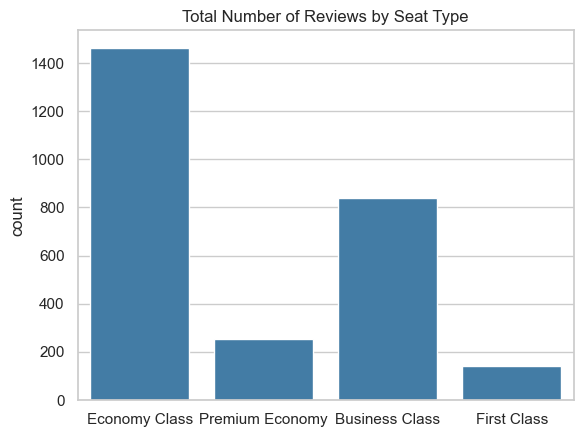

In [17]:
sns.countplot(x='Seat Type', data=ba_df, color='#337FB5')
plt.title('Total Number of Reviews by Seat Type')
plt.xlabel('');

Most of the reviewers are from `Economy Class` and `Business Class`.

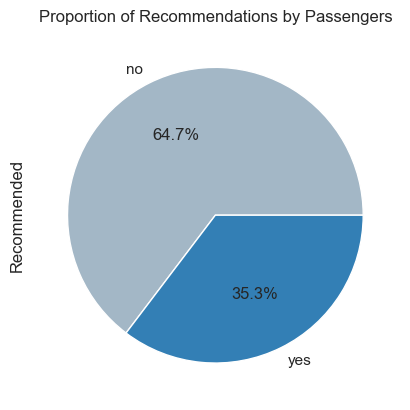

In [69]:
ba_df['Recommended'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', colors=['#A3B7C6', '#337FB5'])
plt.title('Proportion of Recommendations by Passengers')
plt.show()

About **64.7%** of the reviewers would **not recommend** BA. This is an issue that must be addressed.

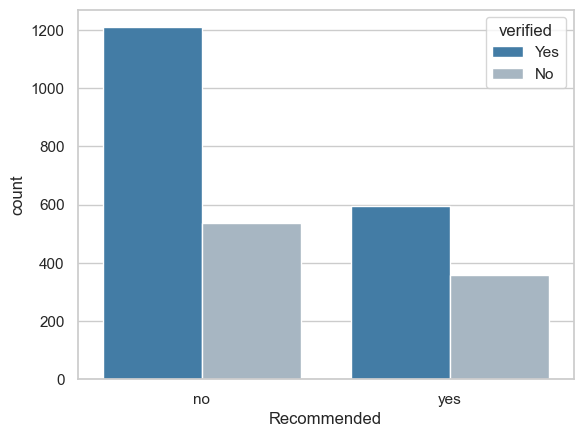

In [28]:
sns.countplot(data=ba_df, x='Recommended', hue='verified', palette=['#337FB5', '#A3B7C6']);

Most Verified and Not Verified Reviews also have the same opinions for recommendation!

What are the popular Departure and Destination Cities? Are the having good reviews?

In [38]:
top_10_departure = ba_df.groupby('Departure')['Recommended'].count().sort_values(ascending=False).head(10).index
top_10_destination = ba_df.groupby('Destination')['Recommended'].count().sort_values(ascending=False).head(10).index

In [48]:
top_10_destination

Index([' London', ' LHR', ' London Heathrow', ' Gatwick', ' LGW', ' Heathrow',
       'n ', ' Johannesburg', ' London Gatwick', ' Cape Town'],
      dtype='object', name='Destination')

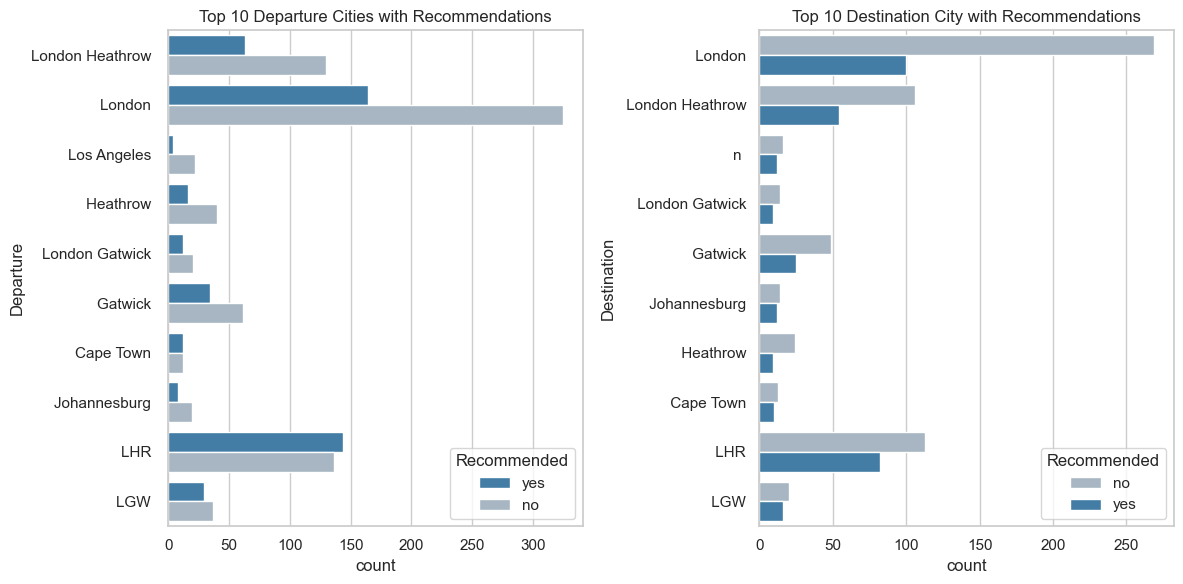

In [57]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))


data_depart = ba_df[ba_df['Departure'].isin(top_10_departure)]
sns.countplot(data=data_depart, y='Departure', hue='Recommended', palette=['#337FB5', '#A3B7C6'], ax=ax[0])
ax[0].set_title('Top 10 Departure Cities with Recommendations')

data_des = ba_df[ba_df['Destination'].isin(top_10_destination)]
sns.countplot(data=data_des, y='Destination', hue='Recommended', palette=['#A3B7C6', '#337FB5'], ax=ax[1])
ax[1].set_title('Top 10 Destination City with Recommendations')

plt.tight_layout()
plt.show()

As we would expect, the proportion of yes/no recommendation follow the same trend across cities. Only one departideparture - LHR where yes exceeds no in recommendations.

In [61]:
ba_df.head()

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,verified,review,Year Flown,Month Flown,Departure,Destination
0,A319 / E190,Couple Leisure,Economy Class,Rotterdam to London City,2024-03-01,no,Yes,We chose Rotterdam and London City airport b...,2024,3,Rotterdam,London City
1,None,Solo Leisure,Premium Economy,Kansas City to Dublin via Heathrow,2024-04-01,no,Yes,The entire booking and ticketing experience h...,2024,4,Kansas City,Dublin via Heathrow
2,None,Family Leisure,Economy Class,Tenerife to London,2024-01-01,no,No,British Airways cancelled my flight less th...,2024,1,Tenerife,London
3,A340,Business,Business Class,Lisbon to San Diego,2024-03-01,yes,No,I wanted to write this review so I could give...,2024,3,Lisbon,San Diego
4,Boeing 787,Business,Business Class,London Heathrow to Mumbai,2024-03-01,yes,Yes,Check in fast and friendly. Security a breez...,2024,3,London Heathrow,Mumbai


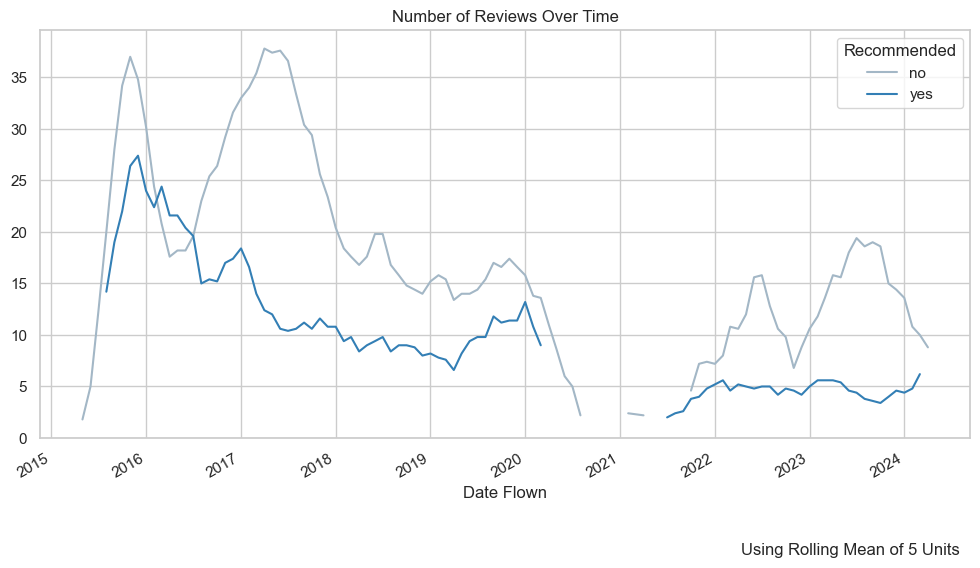

In [83]:
ba_df.groupby(['Date Flown', 'Recommended']).count()['review'].unstack().rolling(window=5).mean().plot(kind='line', figsize=(12, 6), color=['#A3B7C6', '#337FB5'])
plt.title('Number of Reviews Over Time')
plt.figtext(0.80, 0, 'Using Rolling Mean of 5 Units', ha='center', va='bottom')
plt.show()

### Sentimental Analysis

In [84]:
from wordcloud import WordCloud, STOPWORDS

In [91]:
review_text = ' '.join(ba_df['review'])

In [92]:
wc = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(review_text)

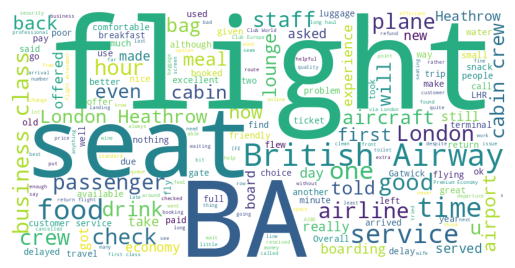

In [95]:
plt.imshow(wc)
plt.axis('off');

In [97]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [98]:
analyzer = SentimentIntensityAnalyzer()

analyzer.polarity_scores('I love this airline')

{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.6369}

In [99]:
def get_comound_score(review):
    return analyzer.polarity_scores(review)['compound']

ba_df['sentiment'] = ba_df['review'].apply(get_comound_score)

ba_df.head()

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,verified,review,Year Flown,Month Flown,Departure,Destination,sentiment
0,A319 / E190,Couple Leisure,Economy Class,Rotterdam to London City,2024-03-01,no,Yes,We chose Rotterdam and London City airport b...,2024,3,Rotterdam,London City,0.7349
1,None,Solo Leisure,Premium Economy,Kansas City to Dublin via Heathrow,2024-04-01,no,Yes,The entire booking and ticketing experience h...,2024,4,Kansas City,Dublin via Heathrow,-0.9474
2,None,Family Leisure,Economy Class,Tenerife to London,2024-01-01,no,No,British Airways cancelled my flight less th...,2024,1,Tenerife,London,-0.9414
3,A340,Business,Business Class,Lisbon to San Diego,2024-03-01,yes,No,I wanted to write this review so I could give...,2024,3,Lisbon,San Diego,0.9700
4,Boeing 787,Business,Business Class,London Heathrow to Mumbai,2024-03-01,yes,Yes,Check in fast and friendly. Security a breez...,2024,3,London Heathrow,Mumbai,0.9826


In [102]:
ba_df['review'].iloc[0]

'  We chose Rotterdam and London City airport because of convenience, both small and having a hotel in the Docklands meant a short distance from City Airport. Three hours before our departure our flight was canceled however. Disappointing, but we made a swift move to Amsterdam Schiphol Airport, but unfortunately we were offered a flight to Heathrow, which meant almost 1,5 hours by tube to our hotel. Flight back operated out of LCY to RTM, but had a 30 mins delay, so in terms of punctuality BA is not very reliant. The flights were okay, with a snack and a drink. The E190 being far more comfortable with 2-2 seating and more legroom than the A319. Our extra expenses for the cancelled flight were handled promptly and we got all the money for extra transport and food back, so BA did a good job in this respect. But hesitant to book again, though they are the only airline flying between RTM and LCY.'

In [103]:
ba_df['sentiment_class'] = ba_df['sentiment'].apply(lambda x: 'Positive' if x > 0.4 else ('Negative' if x < 0 else 'Neutral'))

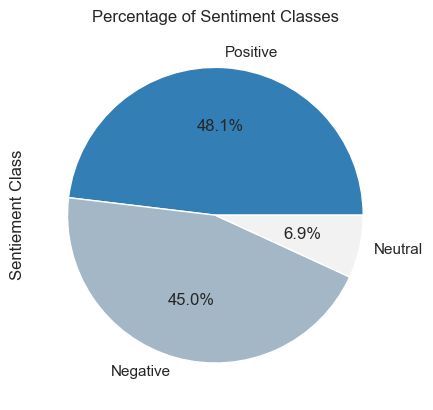

In [106]:
ba_df['sentiment_class'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', colors=['#337FB5','#A3B7C6', '#F2F2F2'])
plt.ylabel('Sentiement Class')
plt.title('Percentage of Sentiment Classes')
plt.show()

**Observation**
- The outcome of the analysis having proportion of positive and negative being quite close 48.1% positive and 45% negative. And only 6.9% Neutral.
- But the recommendation indicates otherwise with 64.7% would not recommend flying with BA.

**Recommendation**
- Even though the percentage of Positive Review exceeds the other but only a small amount, most of our customers would not recommend our airlines or flying with us again. This is a huge issues we need to address.
- Next steps would be dive deeper to the analysis to find out which factor making up the negative or No (recommended) reviews -> Find out the problem and improve in those areas. Also looking at the factor that the customers love --> keep doing what we are doing good!